In [1]:
using CSV
using DataFrames
using Statistics: mean
using Plots
using Printf

In [2]:
# files = ["log/20250218_124857.csv", "log/20250218_124912.csv", "log/20250218_131213.csv", "log/20250218_131214.csv", "log/20250218_132551.csv"]
files = [
    "log/20250813_140528.csv", "log/20250813_140630.csv", "log/20250813_140657.csv", "log/20250813_154028.csv",
    "log/20250813_182235.csv", "log/20250813_182301.csv", "log/20250813_182312.csv", "log/20250813_182327.csv",
]
dfs = [CSV.read(file, DataFrame) for file in files]
df = vcat(dfs...)
@show names(df), size(df)

grouping_cols = setdiff(names(df), ["trial", "mean_ϕC", "std_ϕC"])

df = combine(groupby(df, grouping_cols)) do subdf
    n = subdf.trial       # Number of trials
    mu = subdf.mean_ϕC    # Mean cooperation rate for each group
    sigma = subdf.std_ϕC  # Standard deviation for each group

    # Overall mean (weighted by the number of trials)
    mu_total = sum(n .* mu) / sum(n)

    # Overall standard deviation (aggregated variance)
    V_total = sum(n .* (sigma .^ 2)) / sum(n) + sum(n .* (mu .- mu_total) .^ 2) / sum(n)
    sigma_total = sqrt(V_total)

    # Return the aggregated results
    (trial = sum(n), mean_ϕC = mu_total, std_ϕC = sigma_total)
end |> sort
@show names(df), size(df)

combine(
    groupby(df, [:prob_EV, :prob_move, :N]),
    :trial => mean => :trial,
    :trial => length => :count
) |> sort

(names(df), size(df)) = (["dims", "periodic_space", "distance_metric", "N", "ϕC0", "prob_EV", "λ", "cycle", "sor_vec", "T", "S", "prob_move", "sor_orientation", "x0", "μ", "generation", "trial", "mean_ϕC", "std_ϕC"], (128, 19))
(names(df), size(df)) = (["dims", "periodic_space", "distance_metric", "N", "ϕC0", "prob_EV", "λ", "cycle", "sor_vec", "T", "S", "prob_move", "sor_orientation", "x0", "μ", "generation", "trial", "mean_ϕC", "std_ϕC"], (32, 19))


Row,prob_EV,prob_move,N,trial,count
,Float64,Float64,Int64,Float64,Int64
1,0.0,0.1,250,100.0,1
2,0.0,0.1,500,100.0,1
3,0.0,0.1,1000,100.0,1
4,0.0,0.1,2000,100.0,1
5,0.0,0.1,4000,100.0,1
6,0.0,0.1,8000,100.0,1
7,0.0,0.1,16000,100.0,1
8,0.0,0.1,32000,100.0,1
9,0.0,1.0,250,100.0,1


In [3]:
const DARK_BLUE = "#2D579A"
const DARK_RED = "#B32034"

default(
    fontfamily="Arial",
    titlefontsize=16,
    guidefontsize=14,
    tickfontsize=11,
    legendfontsize=11,
    lw = 2,
    margin=5Plots.mm,
    dpi=600,
);

# Line graph

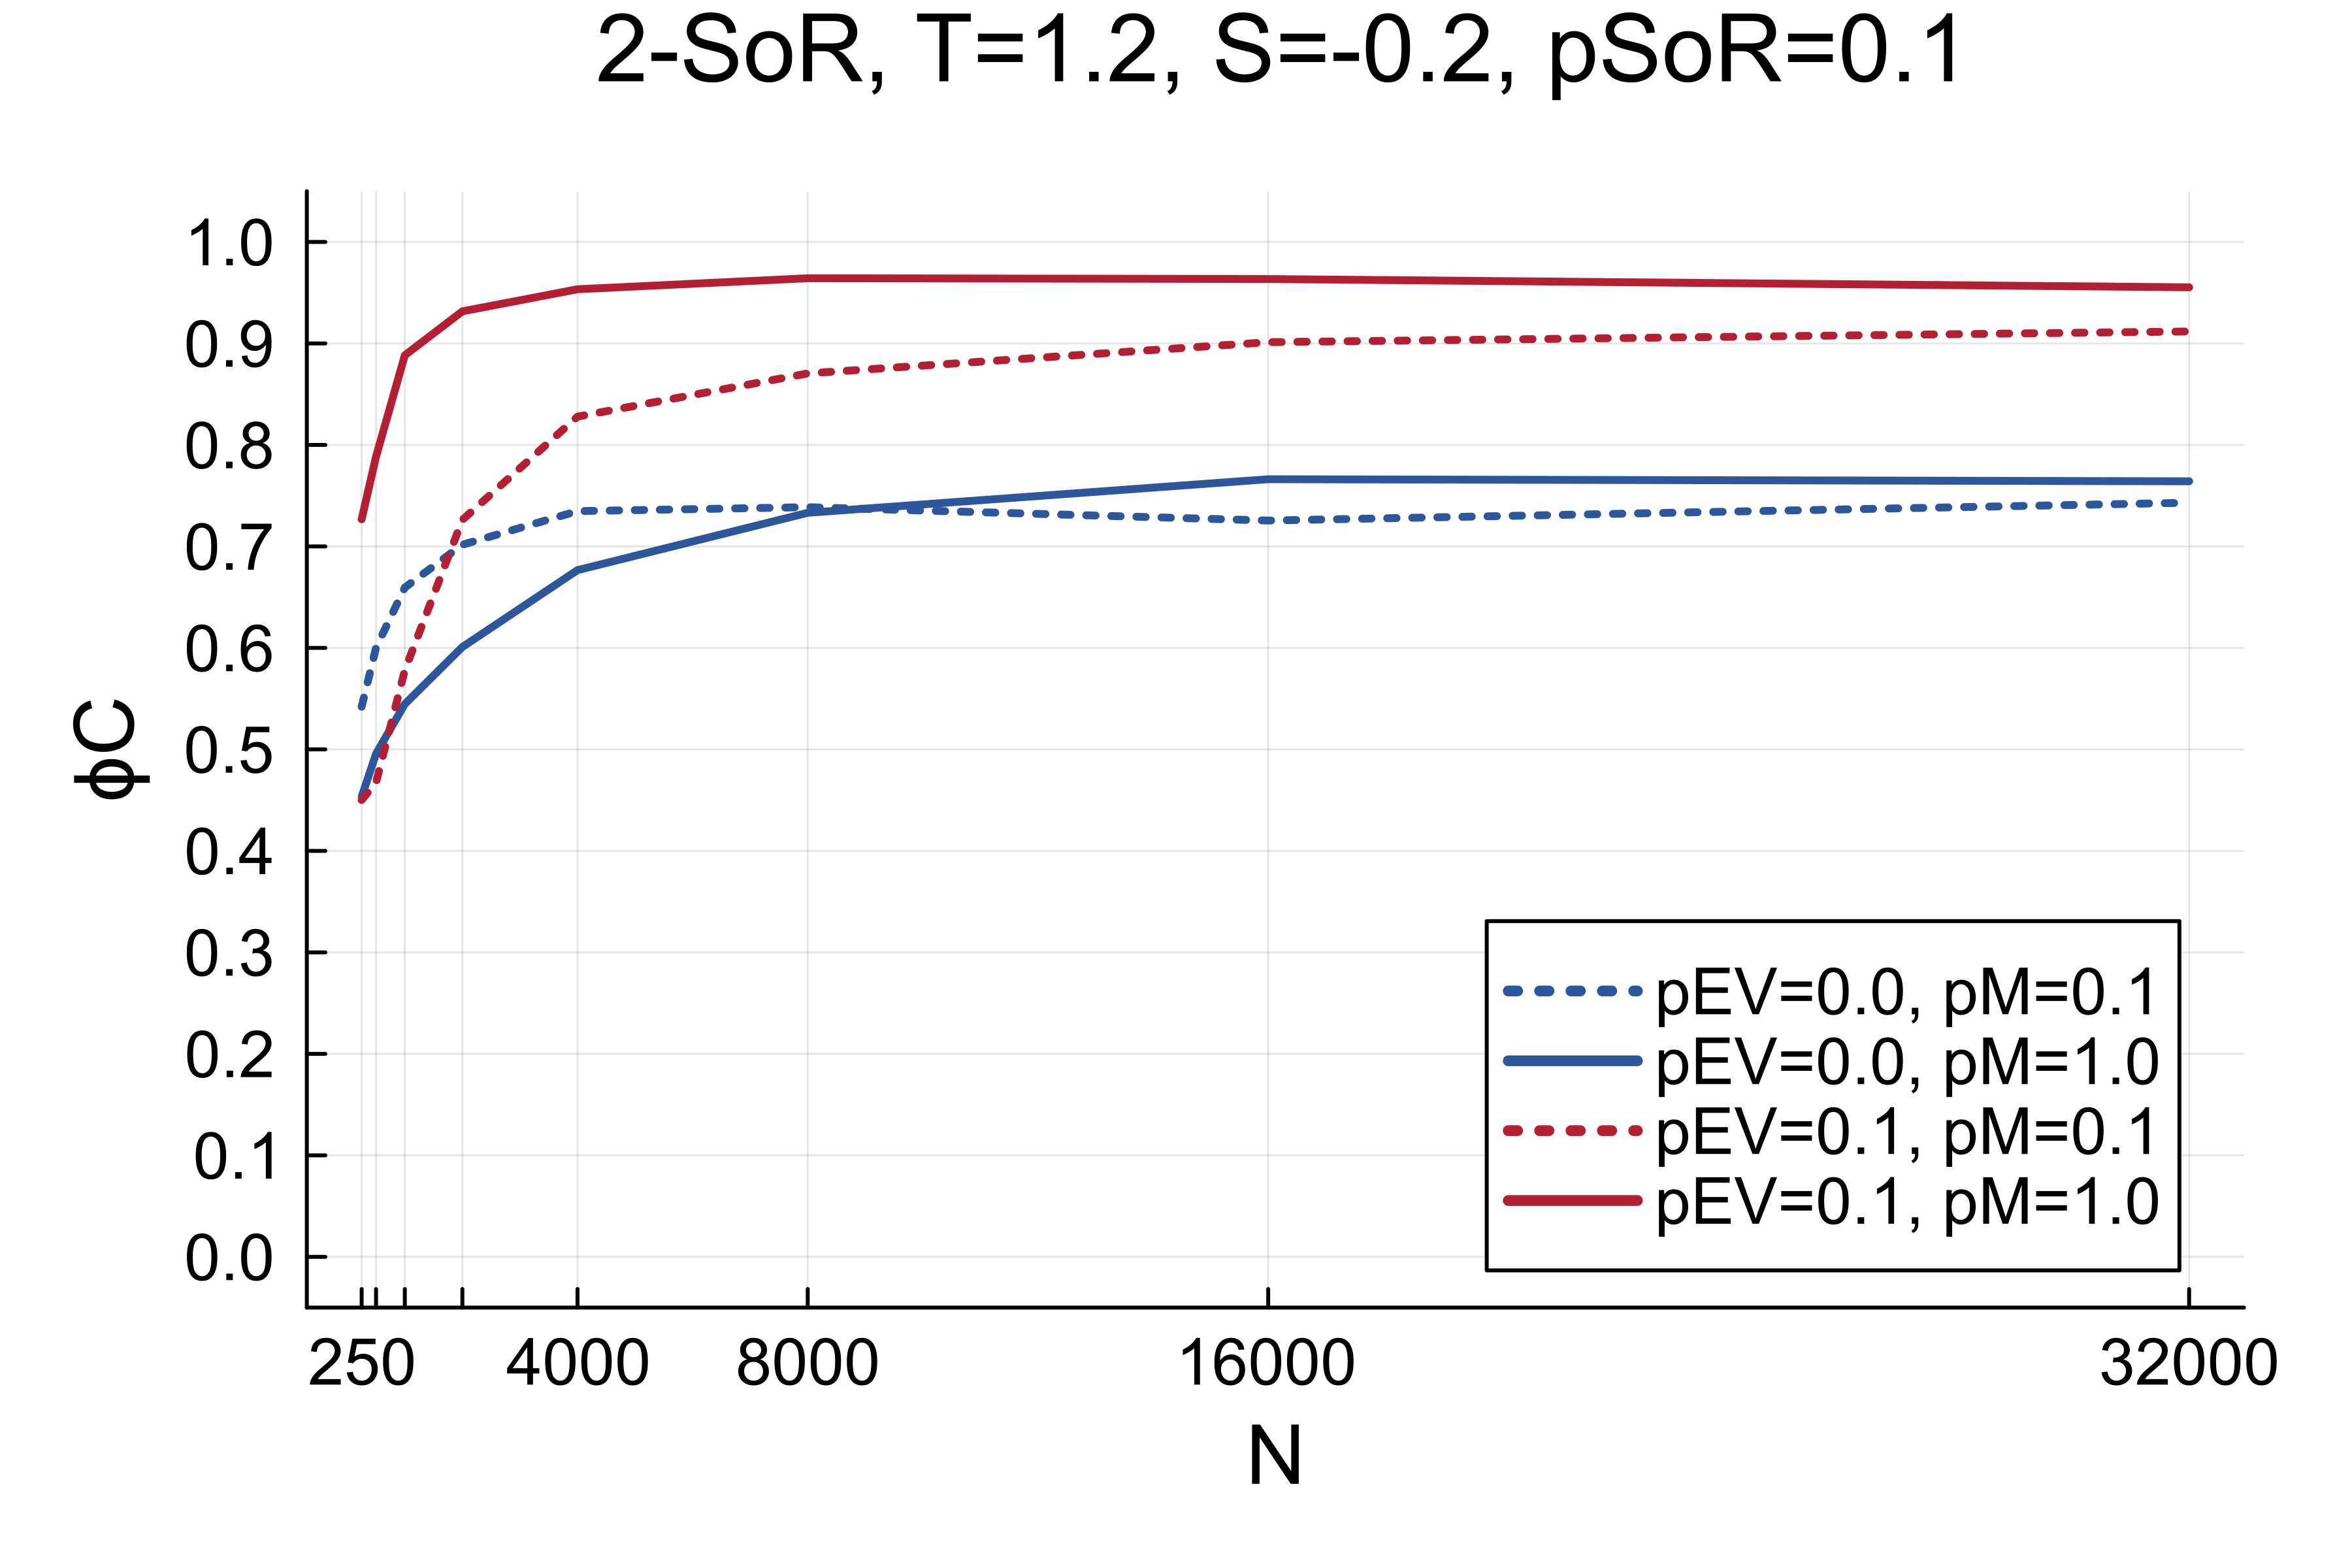

In [5]:
title_sor = length(df.sor_vec[1]) >= 13 ? "2-SoR" : "1-SoR"

p = plot(
    title = "$(title_sor), T=$(df.T[1]), S=$(df.S[1]), pSoR=$(df.sor_orientation[1])",
    legend = :bottomright,
    xlabel = "N",
    xticks = (sort(collect(Set(df.N))), ["250", "", "", "", "4000", "8000", "16000", "32000"]),
    ylabel = "ϕC",
    ylim = (-0.05, 1.05),
    yticks = 0:0.1:1,
)

grouping_cols = setdiff(names(df), ["N", "trial", "mean_ϕC", "std_ϕC"])

line_styles = [
    (DARK_BLUE, :dot),      # 1本目: 青点線
    (DARK_BLUE, :solid),    # 2本目: 青実線
    (DARK_RED, :dot),       # 3本目: 赤点線
    (DARK_RED, :solid)      # 4本目: 赤実線
]

for (i, _df) in enumerate(groupby(sort(df), grouping_cols))
    line_label = "pEV=$(_df.prob_EV[1]), pM=$(_df.prob_move[1])"
    color, linestyle = line_styles[i]
    plot!(_df.N, _df.mean_ϕC, label = line_label, color = color, linestyle = linestyle)
end

display(p);

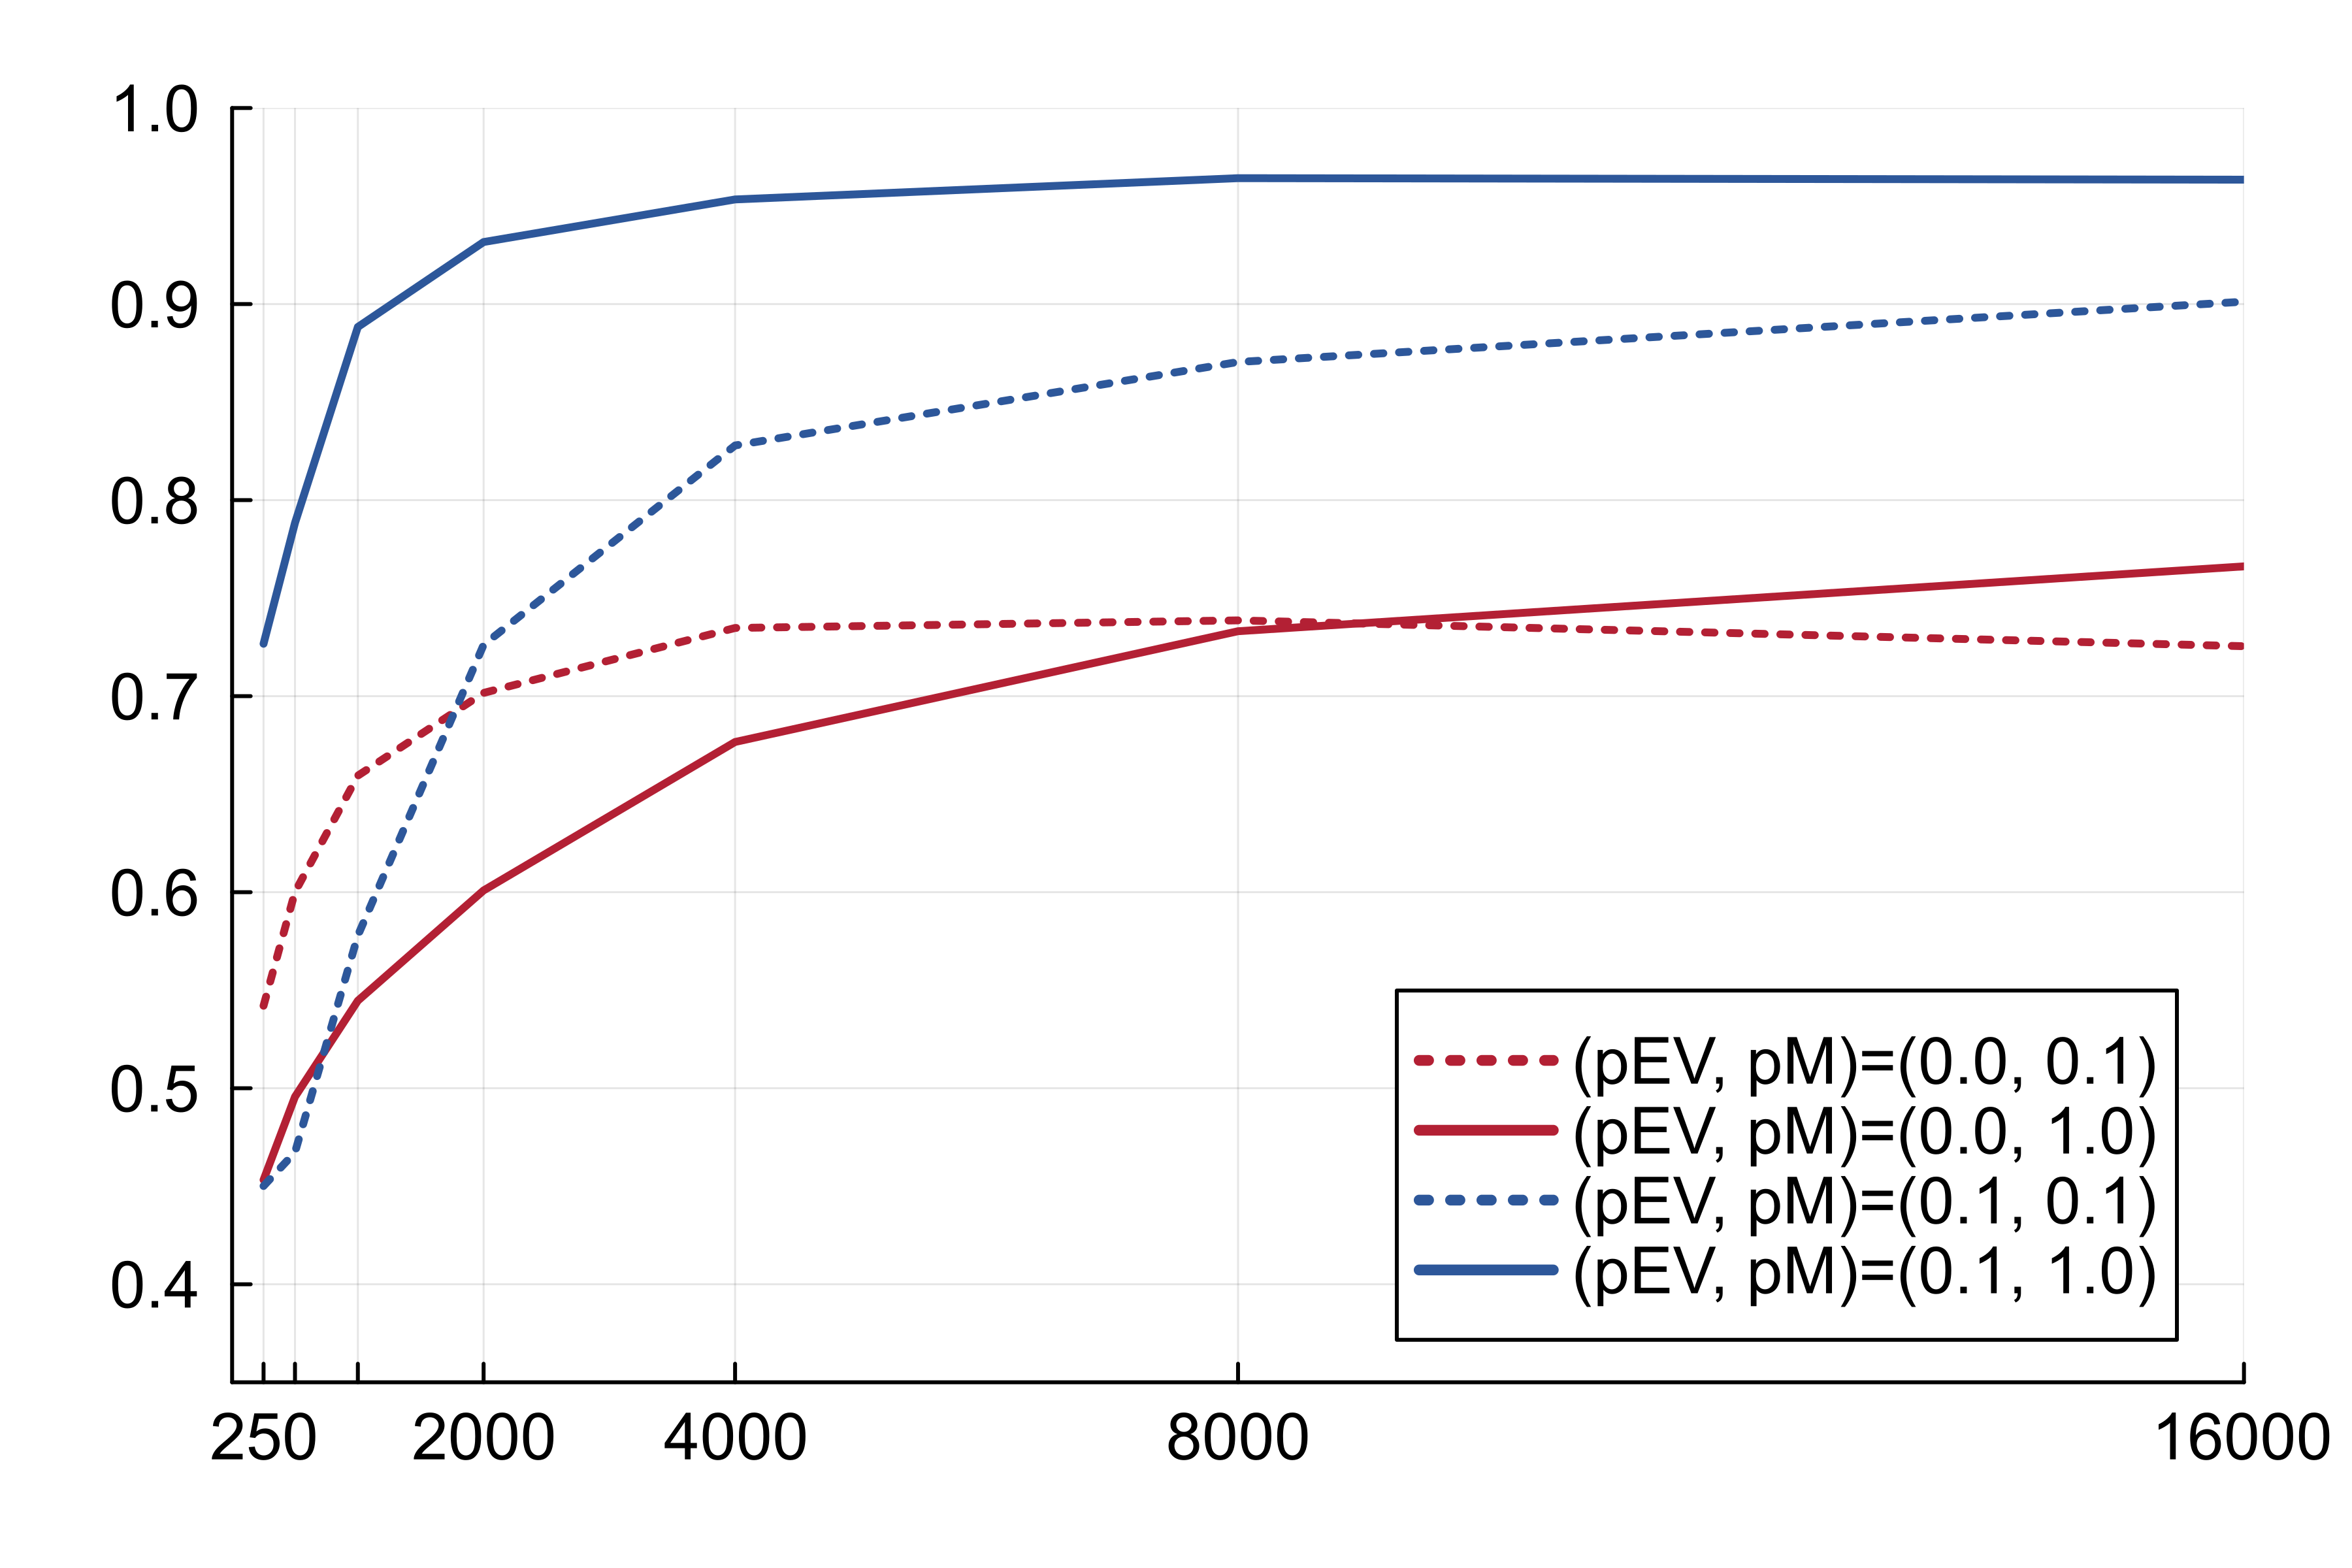

In [23]:
title_sor = length(df.sor_vec[1]) >= 13 ? "2-SoR" : "1-SoR"

p = plot(
    legend = :bottomright,
    xticks = (sort(collect(Set(df.N))), ["250", "", "", "2000", "4000", "8000", "16000"]),
    xlim = (0, 16_000),
    ylim = (0.35, 1),
    yticks = 0:0.1:1,
)

grouping_cols = setdiff(names(df), ["N", "trial", "mean_ϕC", "std_ϕC"])

line_styles = [
    (DARK_RED, :dot),      # 1本目: 青点線
    (DARK_RED, :solid),    # 2本目: 青実線
    (DARK_BLUE, :dot),       # 3本目: 赤点線
    (DARK_BLUE, :solid)      # 4本目: 赤実線
]

for (i, _df) in enumerate(groupby(sort(df[df.N .<= 16_000, :]), grouping_cols))
    line_label = "(pEV, pM)=($(_df.prob_EV[1]), $(_df.prob_move[1]))"
    color, linestyle = line_styles[i]
    plot!(_df.N, _df.mean_ϕC, label = line_label, color = color, linestyle = linestyle)
end

display(p)
savefig("img/Fig_4_Population.png");